In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\sruth\Downloads\archive\screentime_analysis.csv')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [4]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

In [5]:
df[["Usage (minutes)", "Notifications", "Times Opened"]].dtypes

Usage (minutes)    int64
Notifications      int64
Times Opened       int64
dtype: object

In [6]:
df.isnull().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

In [7]:
df["App"].unique()

array(['Instagram', 'X', 'WhatsApp', '8 Ball Pool', 'Safari', 'Netflix',
       'Facebook', 'LinkedIn'], dtype=object)

In [8]:
df.shape

(200, 5)

In [9]:
dates=df['Date'].value_counts()
print(dates)

Date
2024-08-26    16
2024-08-30    12
2024-08-03    11
2024-08-01    10
2024-08-23     9
2024-08-10     8
2024-08-20     8
2024-08-17     8
2024-08-22     8
2024-08-27     7
2024-08-28     7
2024-08-16     7
2024-08-24     7
2024-08-05     6
2024-08-25     6
2024-08-18     6
2024-08-29     6
2024-08-08     6
2024-08-12     6
2024-08-13     6
2024-08-07     6
2024-08-19     5
2024-08-14     5
2024-08-09     5
2024-08-04     5
2024-08-21     4
2024-08-06     3
2024-08-11     3
2024-08-15     2
2024-08-02     2
Name: count, dtype: int64


In [10]:
apps=df['App'].value_counts()
print(apps)

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64


The total and average usage time for each app is given below:

In [11]:
total_usage_df=df.groupby("App")["Usage (minutes)"].sum().reset_index()
mean_usage_df=df.groupby("App")["Usage (minutes)"].mean().reset_index()

In [12]:
print(total_usage_df)
print(mean_usage_df)

           App  Usage (minutes)
0  8 Ball Pool              452
1     Facebook              842
2    Instagram             1898
3     LinkedIn              390
4      Netflix             1819
5       Safari              270
6     WhatsApp             1204
7            X              675
           App  Usage (minutes)
0  8 Ball Pool            18.08
1     Facebook            33.68
2    Instagram            75.92
3     LinkedIn            15.60
4      Netflix            72.76
5       Safari            10.80
6     WhatsApp            48.16
7            X            27.00


Clearly, Instagram and Netflix are the most-used apps, with an average usage time of 76 mins and 73 mins in a day respectively.

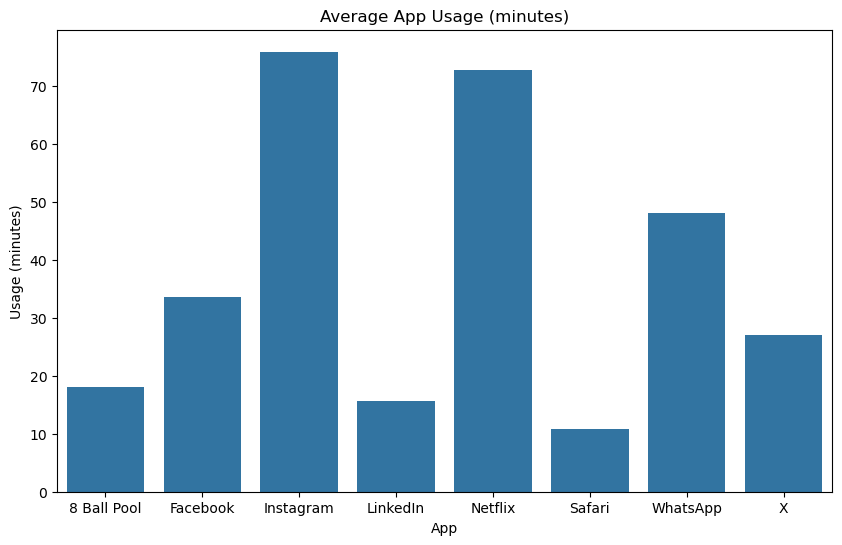

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=mean_usage_df, x='App', y='Usage (minutes)')
plt.title("Average App Usage (minutes)")
plt.show()

In [14]:
total_notif_df=df.groupby("App")["Notifications"].sum().reset_index()
mean_notif_df=df.groupby("App")["Notifications"].mean().reset_index()
print(mean_notif_df)
print(total_notif_df)

           App  Notifications
0  8 Ball Pool           4.52
1     Facebook          39.72
2    Instagram          49.80
3     LinkedIn           8.92
4      Netflix           0.44
5       Safari           0.72
6     WhatsApp          99.92
7            X          25.84
           App  Notifications
0  8 Ball Pool            113
1     Facebook            993
2    Instagram           1245
3     LinkedIn            223
4      Netflix             11
5       Safari             18
6     WhatsApp           2498
7            X            646


Whatsapp, being a messaging platform, sends the most number of notifications, with around 100 notifications being sent to the user in a day. It is followed by Instagram and Facebook, with 50 and 40 notifications respectively. Netflix sent the least number of notifications.

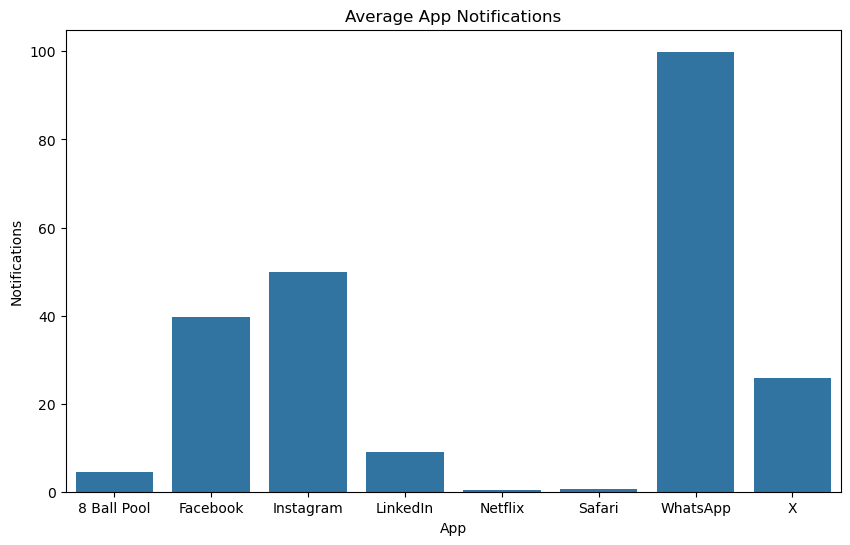

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=mean_notif_df, x='App', y='Notifications')
plt.title("Average App Notifications")
plt.show()

In [16]:
total_op_df=df.groupby("App")["Times Opened"].sum().reset_index()
mean_op_df=df.groupby("App")["Times Opened"].mean().reset_index()
print(mean_op_df)
print(total_op_df)

           App  Times Opened
0  8 Ball Pool          7.28
1     Facebook         30.20
2    Instagram         41.56
3     LinkedIn          4.76
4      Netflix          2.56
5       Safari          5.28
6     WhatsApp         68.24
7            X         13.16
           App  Times Opened
0  8 Ball Pool           182
1     Facebook           755
2    Instagram          1039
3     LinkedIn           119
4      Netflix            64
5       Safari           132
6     WhatsApp          1706
7            X           329


Here also, Whatsapp and Instagram are the most frequently opened apps, with users opening it around 68 and 42 times in a day respectively.

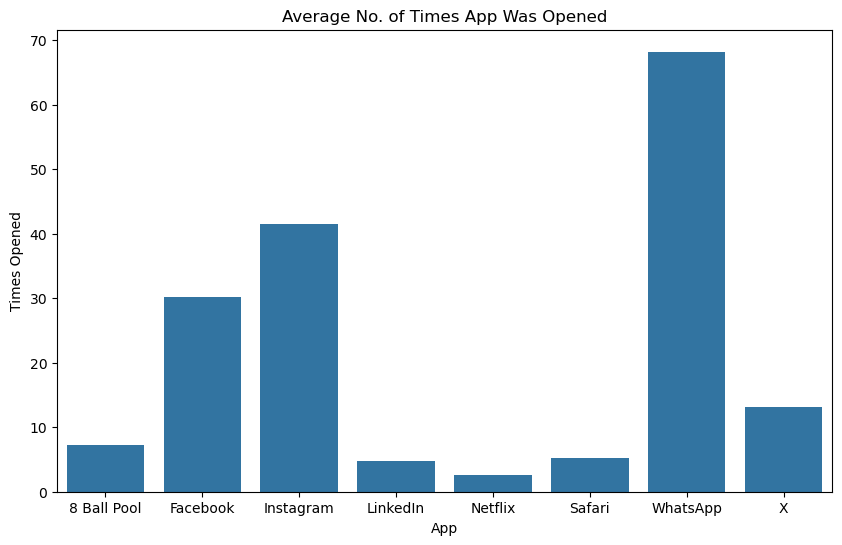

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=mean_op_df, x='App', y='Times Opened')
plt.title("Average No. of Times App Was Opened")
plt.show()

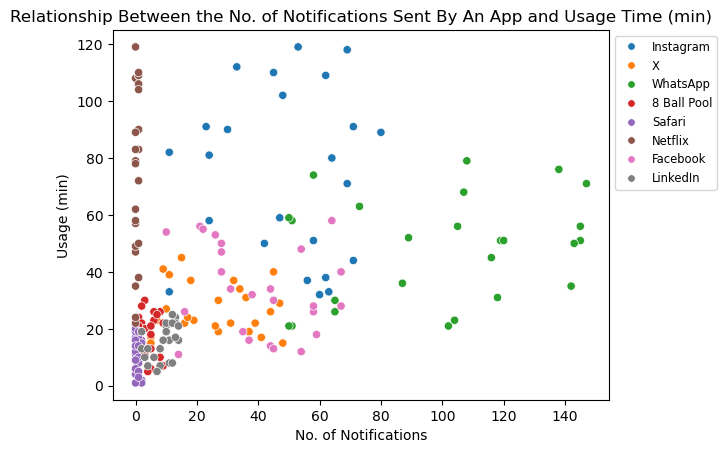

In [18]:
sns.scatterplot(x="Notifications", y="Usage (minutes)",data=df, hue="App")
plt.title("Relationship Between the No. of Notifications Sent By An App and Usage Time (min)")
plt.ylabel("Usage (min)")
plt.xlabel("No. of Notifications")
plt.legend(fontsize='small', markerscale=0.9, bbox_to_anchor=(1,1))
plt.show()

In [19]:
Appl=list(df['App'].unique())

In [20]:
corr_list=[]
for app in Appl:
    app_data=df.loc[df['App']==app]
    corr_list.append(app_data['Usage (minutes)'].corr(app_data['Notifications']))
usg_ntf_corr_data=pd.DataFrame({'App':Appl, 'Correlation Value':corr_list})
usg_ntf_corr_data

,App,Correlation Value
0,Instagram,0.051211
1,X,-0.074395
2,WhatsApp,0.255759
3,8 Ball Pool,-0.203034
4,Safari,-0.177313
5,Netflix,0.298966
6,Facebook,-0.226642
7,LinkedIn,0.404596


Clearly, there is very poor corelation between no. of notifications and app usage for most of the apps.

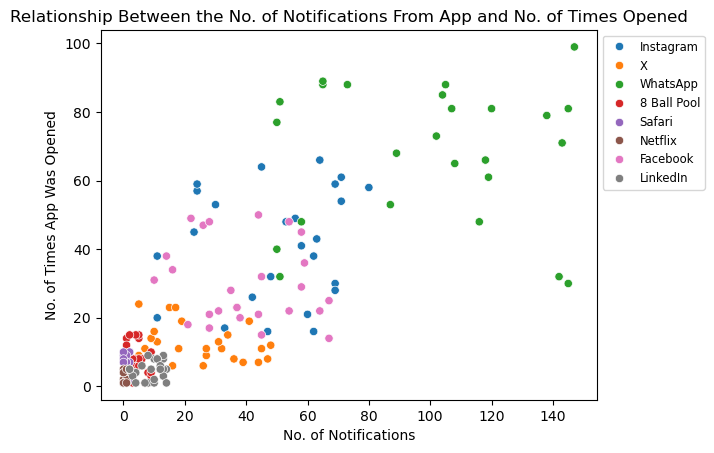

In [21]:
sns.scatterplot(x="Notifications",y="Times Opened", data=df, hue="App")
plt.title("Relationship Between the No. of Notifications From App and No. of Times Opened")
plt.xlabel("No. of Notifications")
plt.ylabel("No. of Times App Was Opened")
plt.legend(fontsize='small', bbox_to_anchor=(1,1))
plt.show()

In [22]:
corr_list_2=[]
for app in Appl:
    app_data=df.loc[df['App']==app]
    corr_list_2.append(app_data['Times Opened'].corr(app_data['Notifications']))
opn_ntf_corr_data=pd.DataFrame({'App':Appl, 'Correlation Value':corr_list_2})
opn_ntf_corr_data

,App,Correlation Value
0,Instagram,0.153359
1,X,-0.275836
2,WhatsApp,0.025619
3,8 Ball Pool,-0.301558
4,Safari,0.220781
5,Netflix,-0.246701
6,Facebook,-0.161024
7,LinkedIn,0.203515


Here also, there does not seem to be much a relationship between no. of notifications and the number of times an app was opened.
However, there seems to be a very slight but negative correlation in the case of X, 8 Ball Pool, Netflix and Facebook.

We now add a new column that tells us if a particular day was a weekend or a weekday.

In [23]:
weekend=[]
for i, date in enumerate(df['Date']):
    if date in ['2024-08-03', '2024-08-04', '2024-08-10', '2024-08-11', '2024-08-17', '2024-08-18', '2024-08-24', '2024-08-25']:
        weekend.append(1)
    else:
        weekend.append(0)
print(weekend[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
df['Is_weekend']=weekend

In [25]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,Is_weekend
0,2024-08-07,Instagram,81,24,57,0
1,2024-08-08,Instagram,90,30,53,0
2,2024-08-26,Instagram,112,33,17,0
3,2024-08-22,Instagram,82,11,38,0
4,2024-08-12,Instagram,59,47,16,0


In [26]:
ig_data=df.loc[df['App']=='Instagram']
ig_data_2=ig_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()
ig_data_2

,Is_weekend,Usage (minutes)
0,0,75.0
1,1,79.6


In [27]:
x_data=df.loc[df['App']=='X']
x_data_2=x_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()

whats_data=df.loc[df['App']=='WhatsApp']
whats_data_2=whats_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()

ball_data=df.loc[df['App']=='8 Ball Pool']
ball_data_2=ball_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()

safari_data=df.loc[df['App']=='Safari']
safari_data_2=safari_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()

netflix_data=df.loc[df['App']=='Netflix']
netflix_data_2=netflix_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()

fb_data=df.loc[df['App']=='Facebook']
fb_data_2=fb_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()

linkedin_data=df.loc[df['App']=='LinkedIn']
linkedin_data_2=linkedin_data[['App','Usage (minutes)','Notifications','Times Opened','Is_weekend']].groupby('Is_weekend')['Usage (minutes)'].mean().reset_index()

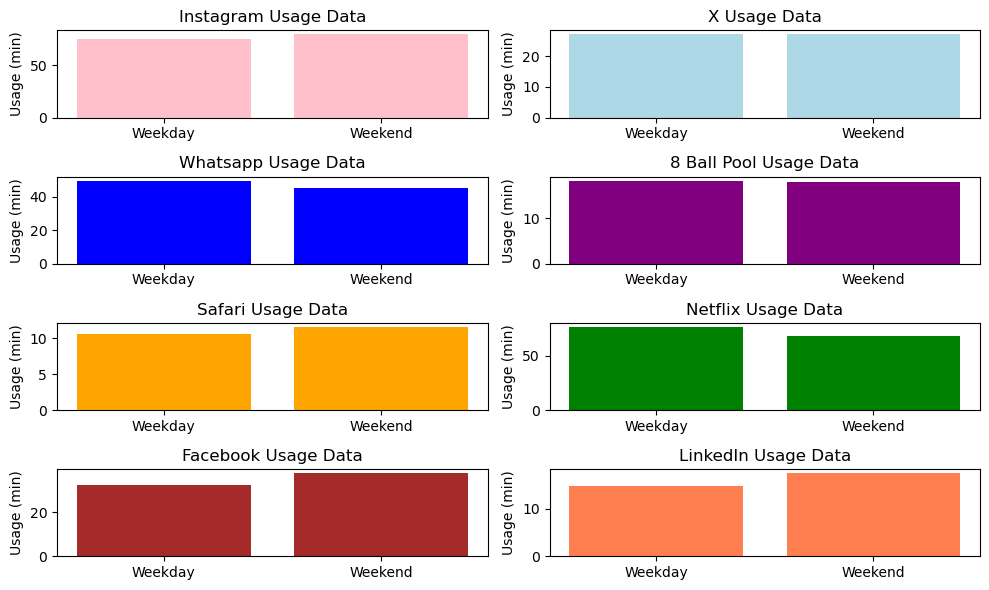

In [28]:
fig,axs=plt.subplots(4,2, figsize=(10,6), sharey=False)
axs[0,0].bar(ig_data_2["Is_weekend"], ig_data_2["Usage (minutes)"], color='pink')
axs[0,0].set_title("Instagram Usage Data")
axs[0,0].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[0,0].set_ylabel("Usage (min)")

axs[0,1].bar(x_data_2["Is_weekend"], x_data_2["Usage (minutes)"], color='lightblue')
axs[0,1].set_title("X Usage Data")
axs[0,1].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[0,1].set_ylabel("Usage (min)")

axs[1,0].bar(whats_data_2["Is_weekend"], whats_data_2["Usage (minutes)"], color='blue')
axs[1,0].set_title("Whatsapp Usage Data")
axs[1,0].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[1,0].set_ylabel("Usage (min)")

axs[1,1].bar(ball_data_2["Is_weekend"], ball_data_2["Usage (minutes)"], color='purple')
axs[1,1].set_title("8 Ball Pool Usage Data")
axs[1,1].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[1,1].set_ylabel("Usage (min)")

axs[2,0].bar(safari_data_2["Is_weekend"], safari_data_2["Usage (minutes)"], color='orange')
axs[2,0].set_title("Safari Usage Data")
axs[2,0].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[2,0].set_ylabel("Usage (min)")

axs[2,1].bar(netflix_data_2["Is_weekend"], netflix_data_2["Usage (minutes)"], color='green')
axs[2,1].set_title("Netflix Usage Data")
axs[2,1].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[2,1].set_ylabel("Usage (min)")

axs[3,0].bar(fb_data_2["Is_weekend"], fb_data_2["Usage (minutes)"], color='brown')
axs[3,0].set_title("Facebook Usage Data")
axs[3,0].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[3,0].set_ylabel("Usage (min)")

axs[3,1].bar(linkedin_data_2["Is_weekend"], linkedin_data_2["Usage (minutes)"], color='coral')
axs[3,1].set_title("LinkedIn Usage Data")
axs[3,1].set_xticks(ticks=[0,1],labels=['Weekday', 'Weekend'])
axs[3,1].set_ylabel("Usage (min)")

fig.tight_layout()
plt.show()

Whatsapp and Netflix were frequently used during the week, as compared to the weekends. X and 8 Ball Pool were used almostly 
equally during weekdays and weekends. The rest of the apps were used more during the weekend, as compared to weekdays.